In [12]:
import numpy as np
import networkx as nx
import scipy
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [68]:
adjlist = [  [0,1,1,0,0,0,0,0,0],
             [1,0,0,1,0,0,0,0,0],
             [1,0,0,1,1,0,0,0,0],
             [0,1,1,0,1,0,0,0,0],
             [0,0,1,1,0,0,0,0,0],
             [0,0,0,0,0,0,1,1,1],
             [0,0,0,0,0,1,0,1,0],
             [0,0,0,0,0,1,1,0,1],
             [0,0,0,0,0,1,0,1,0]  ]
nodenames = ['A','B','C','D','E','F','G','H','I']

In [69]:
adj = np.array(adjlist)
g = nx.DiGraph(adj)
h = nx.relabel_nodes(g,mapping={i:v for i,v in enumerate(nodenames)})

In [ ]:
plt.figure(figsize=(6,6))
pos = nx.spring_layout(h)
nx.draw_networkx_nodes(h, pos, cmap=plt.get_cmap('jet'), node_size = 400)
nx.draw_networkx_labels(h, pos)
nx.draw_networkx_edges(h, pos, edgelist=h.edges(), arrows=False)
plt.show()

### Eigens

In [78]:
A = adj

In [85]:
D = np.diag(A.sum(axis=1))

In [87]:
L = D-A

In [79]:
vals, vecs = np.linalg.eig(L)
# print results
for i, value in enumerate(vals):
    print("Eigenvalue:", value)

Eigenvalue: -8.881784197001252e-16
Eigenvalue: 4.618033988749893
Eigenvalue: 1.3819660112501035
Eigenvalue: 2.3819660112501024
Eigenvalue: 3.6180339887498945
Eigenvalue: 4.0
Eigenvalue: 1.1102230246251565e-16
Eigenvalue: 4.000000000000001
Eigenvalue: 1.9999999999999998


In [ ]:
plt.scatter(np.arange(9), vals, color='r')

In [227]:
def analyze_graph(a):
    a = np.array(a)
    g = nx.DiGraph(a)
    fig,ax=plt.subplots(1,2)
    fig.set_size_inches(14, 5)
    pos = nx.spring_layout(g)
    nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), node_size = 100, ax=ax[0])
    nx.draw_networkx_labels(g, pos, ax=ax[0])
    nx.draw_networkx_edges(g, pos, edgelist=g.edges(), arrows=False, ax=ax[0])
    d = np.diag(a.sum(axis=1))
    l = d - a
    vals, vecs = np.linalg.eig(l)
    idx = vals.argsort()
    vals = vals[idx]
    vecs = vecs[:,idx]
    ax[1].grid()
    ax[1].scatter(np.arange(len(vals)), vals, color='r')
    labels = [1 if v > 0 else 0 for v in vecs[1]]
    print(labels)
    return vals, vecs, g

[0, 0, 0, 0, 1, 1, 0, 0, 1]


(array([-8.88178420e-16,  1.11022302e-16,  1.38196601e+00,  2.00000000e+00,
         2.38196601e+00,  3.61803399e+00,  4.00000000e+00,  4.00000000e+00,
         4.61803399e+00]),
 array([[-4.47213595e-01,  0.00000000e+00, -5.11667274e-01,
          0.00000000e+00, -6.01500955e-01,  1.95439508e-01,
          0.00000000e+00,  0.00000000e+00, -3.71748034e-01],
        [-4.47213595e-01,  0.00000000e+00, -5.11667274e-01,
          0.00000000e+00,  6.01500955e-01,  1.95439508e-01,
          0.00000000e+00,  0.00000000e+00,  3.71748034e-01],
        [-4.47213595e-01,  0.00000000e+00,  1.95439508e-01,
          0.00000000e+00, -3.71748034e-01, -5.11667274e-01,
          0.00000000e+00,  0.00000000e+00,  6.01500955e-01],
        [-4.47213595e-01,  0.00000000e+00,  1.95439508e-01,
          0.00000000e+00,  3.71748034e-01, -5.11667274e-01,
          0.00000000e+00,  0.00000000e+00, -6.01500955e-01],
        [-4.47213595e-01,  0.00000000e+00,  6.32455532e-01,
          0.00000000e+00,  1.08523598

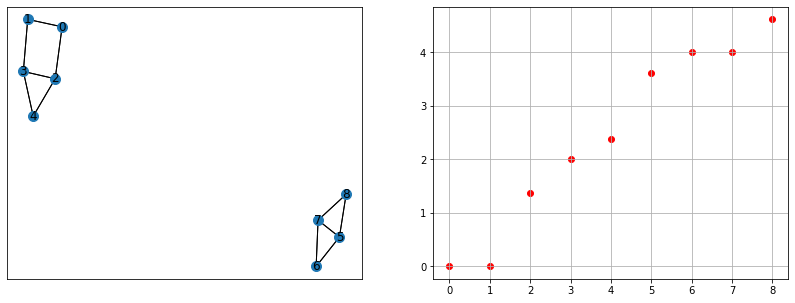

In [228]:
analyze_graph(adj)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]


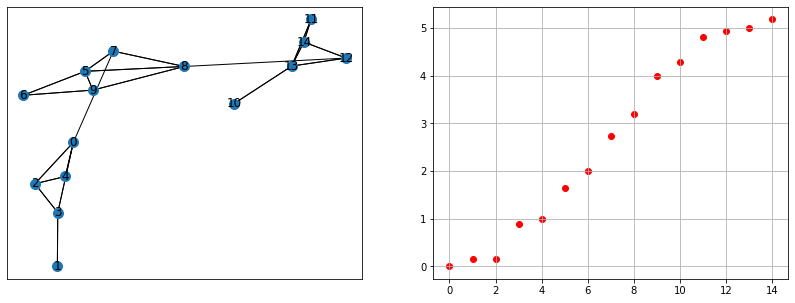

In [236]:
b = np.zeros((15,15), dtype=int)
for r in np.random.randint(low=0,high=5,size=4):
    for c in np.random.randint(low=0,high=5,size=4):
        if r == c:
            continue
        b[r,c] = 1
        b[c,r] = 1
for r in np.random.randint(low=5,high=10,size=4):
    for c in np.random.randint(low=5,high=10,size=4):
        if r == c:
            continue
        b[r,c] = 1
        b[c,r] = 1
for r in np.random.randint(low=10,high=15,size=4):
    for c in np.random.randint(low=10,high=15,size=4):
        if r == c:
            continue
        b[r,c] = 1
        b[c,r] = 1
b[0,7] = 1
b[8,12] = 1
vals, vecs, g = analyze_graph(b)

In [180]:
vecs[0]

array([ 9.23879533e-01, -3.82683432e-01,  2.19836614e-17,  7.58668608e-17,
        4.62592927e-17, -2.16930458e-01, -1.52635224e-17, -3.16227766e-01,
       -5.04222100e-17,  1.59052123e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


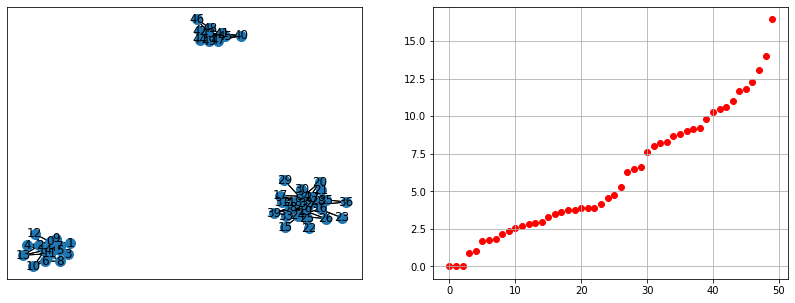

In [264]:
b = np.zeros((50,50), dtype=int)
for r in np.random.randint(low=0,high=15,size=10):
    for c in np.random.randint(low=0,high=15,size=10):
        if r == c:
            continue
        b[r,c] = 1
        b[c,r] = 1
for r in np.random.randint(low=15,high=40,size=10):
    for c in np.random.randint(low=15,high=40,size=10):
        if r == c:
            continue
        b[r,c] = 1
        b[c,r] = 1
for r in np.random.randint(low=40,high=50,size=8):
    for c in np.random.randint(low=40,high=50,size=8):
        if r == c:
            continue
        b[r,c] = 1
        b[c,r] = 1
#b[0,7] = 1
#b[8,12] = 1
vals, vecs, g = analyze_graph(b)

In [265]:
from sklearn.cluster import KMeans

In [266]:
vecs.shape

(50, 50)

In [272]:
x = vecs[:,1:3]

In [273]:
#x = np.transpose(x)
x.shape

(50, 2)

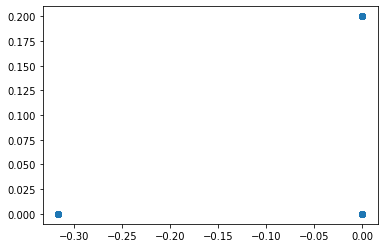

In [274]:
plt.scatter(vecs[:,1], vecs[:,2])

In [275]:
km = KMeans(n_clusters=3).fit(x)

In [276]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)